### Visualizing the Google Words for each political movement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gbooks = pd.read_csv('/Users/andrescrucettanieto/Documents/GitHub/final-project-politicalmovements/data/gbooks/google_words.csv')
terms = pd.read_csv('/Users/andrescrucettanieto/Documents/GitHub/final-project-politicalmovements/data/key_terms.csv')

In [3]:
terms['key_terms'] = terms['Key Terms'].apply(lambda x: x.split(','))
terms.drop('Key Terms', axis=1, inplace=True)
terms = terms.explode('key_terms')
terms['key_terms'] = terms['key_terms'].str.strip()

In [4]:
terms

,Movement,key_terms
0,Nationalism,nationalist
0,Nationalism,nationalism
1,Socialism,socialist
1,Socialism,socialism
2,Communism,communist
2,Communism,communism
3,Fascism,fascist
3,Fascism,fascism
4,Liberalism,liberal
4,Liberalism,liberalism


In [5]:
# Create column for the movement of the term
gbooks = gbooks.merge(terms, left_on='word', right_on='key_terms', how='left')
gbooks.drop('key_terms', axis=1, inplace=True)

In [6]:
movements_yearly = gbooks.groupby(['Movement', 'year']).sum().reset_index()

In [18]:
# Filter out the movements up to 2008
movements_yearly = movements_yearly[movements_yearly['year'] <= 2008]

In [48]:
# Plot the number of words per movement over time
def plot_movement(movements):
    '''
    Input:
        movement: list of strings
    Output:
        None
    '''
    fig, ax = plt.subplots(figsize=(13,8))
    sns.lineplot(x='year', y='occurred',hue='Movement',style='Movement',data=movements_yearly[movements_yearly.Movement.isin(movements)], ax=ax)
    plt.title('Number of Times a Movement Occurred in Google Books')
    plt.xlabel('Year')
    plt.ylabel('Number of Occurrences')
    # Adding a thousand separator to the y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    # Annotate max values per line plot
    for i, line in enumerate(ax.lines):
        ax.annotate(str(line.get_ydata().max()), xy=(line.get_xdata()[np.argmax(line.get_ydata())], line.get_ydata().max()), xycoords='data', xytext=(-10, 10), textcoords='offset points', fontsize=10)
    plt.show()

ValueError: zero-size array to reduction operation maximum which has no identity

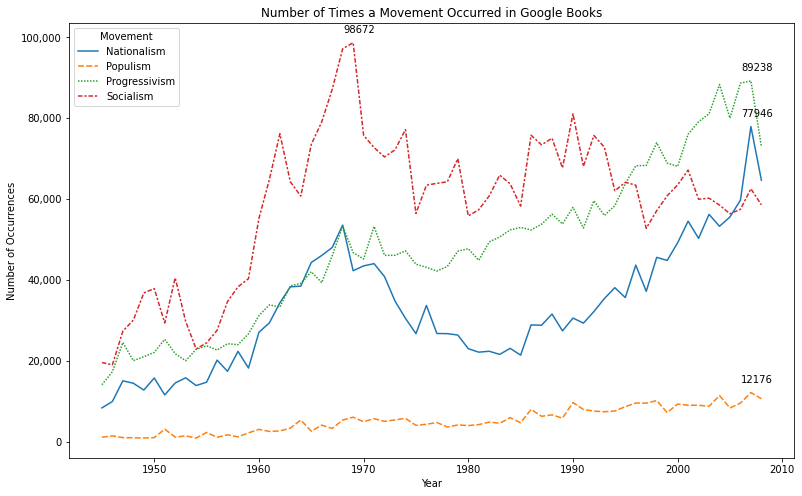

In [49]:
plot_movement(['Socialism','Nationalism','Populism','Progressivism'])